In [2]:
# importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.dates as mdates

In [3]:
#  Reading dataset 
df = pd.read_excel("sample_data.xlsx")

In [20]:
actual  = pd.read_excel("sample_data.xlsx", sheet_name='actual',header=1)
normal  = pd.read_excel("sample_data.xlsx", sheet_name='norm', header=1)
spatial = pd.read_excel("sample_data.xlsx", sheet_name='spatial', header =1)

In [35]:
actual.head()

,S.NO.,STATION,LAT,LON,2023-06-01 00:00:00,2023-06-02 00:00:00,2023-06-03 00:00:00,2023-06-04 00:00:00,2023-06-05 00:00:00,2023-06-06 00:00:00,...,2023-06-21 00:00:00,2023-06-22 00:00:00,2023-06-23 00:00:00,2023-06-24 00:00:00,2023-06-25 00:00:00,2023-06-26 00:00:00,2023-06-27 00:00:00,2023-06-28 00:00:00,2023-06-29 00:00:00,2023-06-30 00:00:00
0,1,CAR NICOBAR,9.17,92.83,0.0,6.0,0.0,15.5,27.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.8,2.2,36.0,24.0
1,2,IAF CARNICOBAR,9.15,92.81,0.0,3.8,8.0,16.0,24.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,2.4,8.6,26.0,36.0
2,3,NANCOWARY,7.98,93.53,7.8,5.8,5.0,3.0,4.6,18.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,7.6,0.0
3,4,LONG ISLAND,12.42,92.93,10.6,2.4,-99.9,6.7,72.5,18.7,...,14.9,35.4,5.0,0.0,0.0,0.0,48.0,19.0,5.0,9.4
4,5,MAYA BANDAR,12.92,92.92,2.0,0.2,7.4,3.0,17.0,22.0,...,12.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
first_station = actual.iloc[0, :]
first_station_norm = normal.iloc[0,:]
first_station

S.NO.                            1
STATION                CAR NICOBAR
LAT                           9.17
LON                          92.83
2023-06-01 00:00:00            0.0
2023-06-02 00:00:00            6.0
2023-06-03 00:00:00            0.0
2023-06-04 00:00:00           15.5
2023-06-05 00:00:00           27.8
2023-06-06 00:00:00            0.0
2023-06-07 00:00:00            7.2
2023-06-08 00:00:00            7.0
2023-06-09 00:00:00            3.6
2023-06-10 00:00:00           17.0
2023-06-11 00:00:00           11.0
2023-06-12 00:00:00            2.0
2023-06-13 00:00:00            3.6
2023-06-14 00:00:00           12.0
2023-06-15 00:00:00           62.8
2023-06-16 00:00:00           53.0
2023-06-17 00:00:00            0.0
2023-06-18 00:00:00           14.0
2023-06-19 00:00:00           10.0
2023-06-20 00:00:00            4.6
2023-06-21 00:00:00            0.0
2023-06-22 00:00:00            0.0
2023-06-23 00:00:00            0.0
2023-06-24 00:00:00            0.0
2023-06-25 00:00:00 

In [ ]:
first_station_norm

In [23]:
new_ds = pd.DataFrame()
new_ds['date'] = first_station.index[4:]
new_ds['actual_rf']= first_station.values[4:]


In [24]:
new_ds

,date,actual_rf
0,2023-06-01,0.0
1,2023-06-02,6.0
2,2023-06-03,0.0
3,2023-06-04,15.5
4,2023-06-05,27.8
5,2023-06-06,0.0
6,2023-06-07,7.2
7,2023-06-08,7.0
8,2023-06-09,3.6
9,2023-06-10,17.0


In [26]:

#lets check the newly created dataset
new_ds
# now i want to calculate the cumulative sum
new_ds['cum_sum'] = new_ds['actual_rf'].cumsum()
# now i will add the normal rainfall in this dataset
new_ds['normal'] = first_station_norm.values[4:]
new_ds['cum_normal']= new_ds['normal'].cumsum()

In [27]:
new_ds

,date,actual_rf,cum_sum,normal,cum_normal
0,2023-06-01,0.0,0.0,10.2,10.2
1,2023-06-02,6.0,6.0,13.6,23.8
2,2023-06-03,0.0,6.0,18.9,42.7
3,2023-06-04,15.5,21.5,11.6,54.3
4,2023-06-05,27.8,49.3,13.3,67.6
5,2023-06-06,0.0,49.3,8.4,76.0
6,2023-06-07,7.2,56.5,9.8,85.8
7,2023-06-08,7.0,63.5,9.9,95.7
8,2023-06-09,3.6,67.1,14.3,110.0
9,2023-06-10,17.0,84.1,6.1,116.1


# Creating a bar plot of actual rainfall and line plot of normal rainfall 

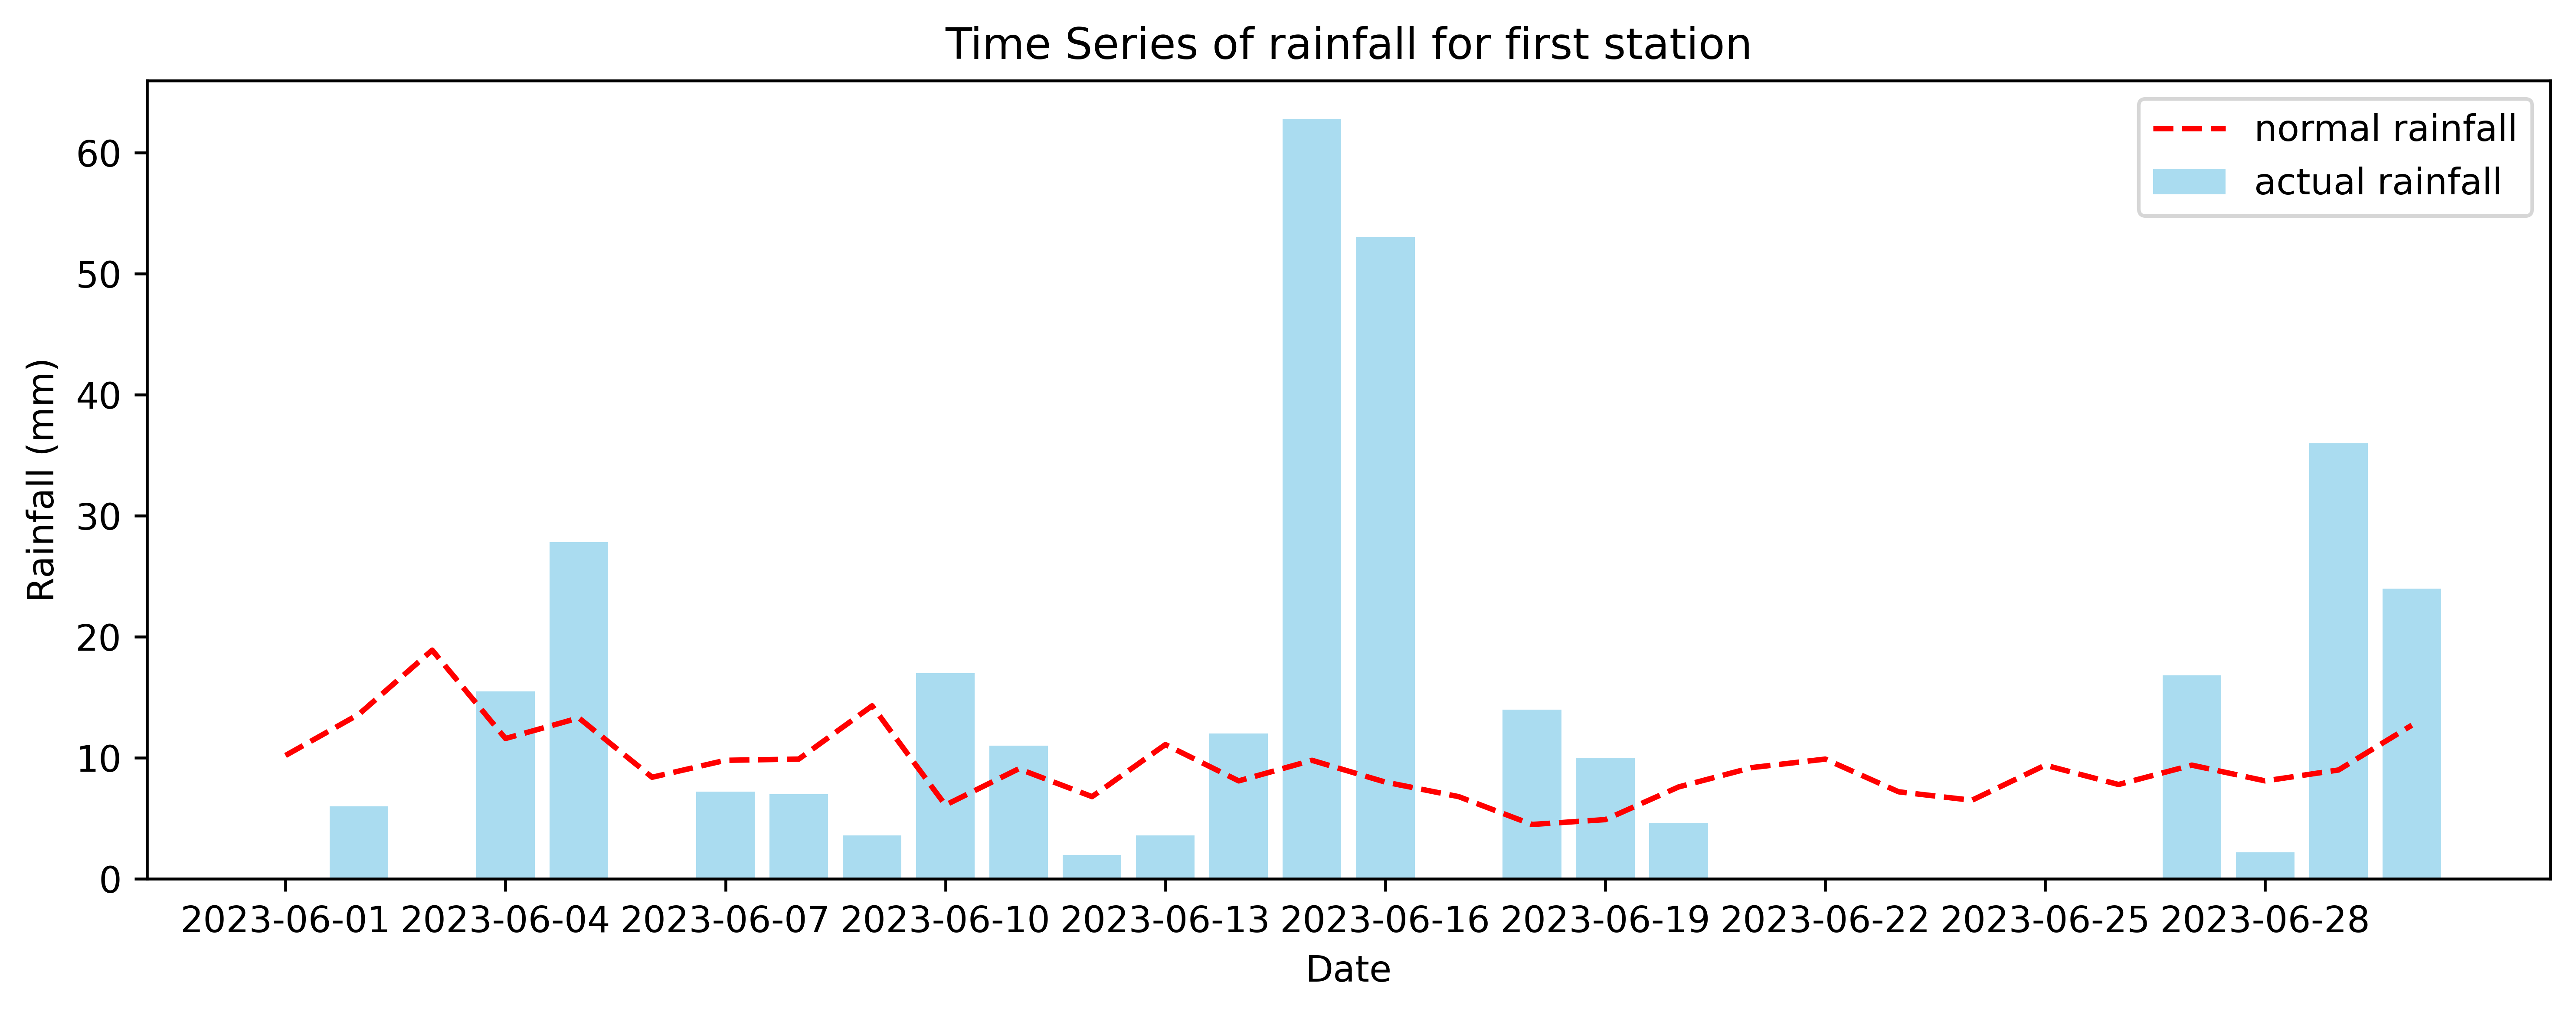

In [33]:

# Create a bar plot

plt.figure(figsize=(10, 4), dpi=600)  # Adjust the figure size if needed
plt.bar(new_ds['date'], new_ds['actual_rf'], width=0.8, color='skyblue', alpha=0.7,label ='actual rainfall')
plt.plot(new_ds['date'], new_ds['normal'], linestyle='--', color ='red', label ='normal rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Time Series of rainfall for first station')
# Format x-axis ticks to display only date and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate x-axis labels for better readability (optional)
plt.xticks(new_ds['date'][::3],rotation=0)  # Rotate x-axis labels for better readability (optional)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


# Creating a line plot of cumulative rainfall and line plot of normal rainfall

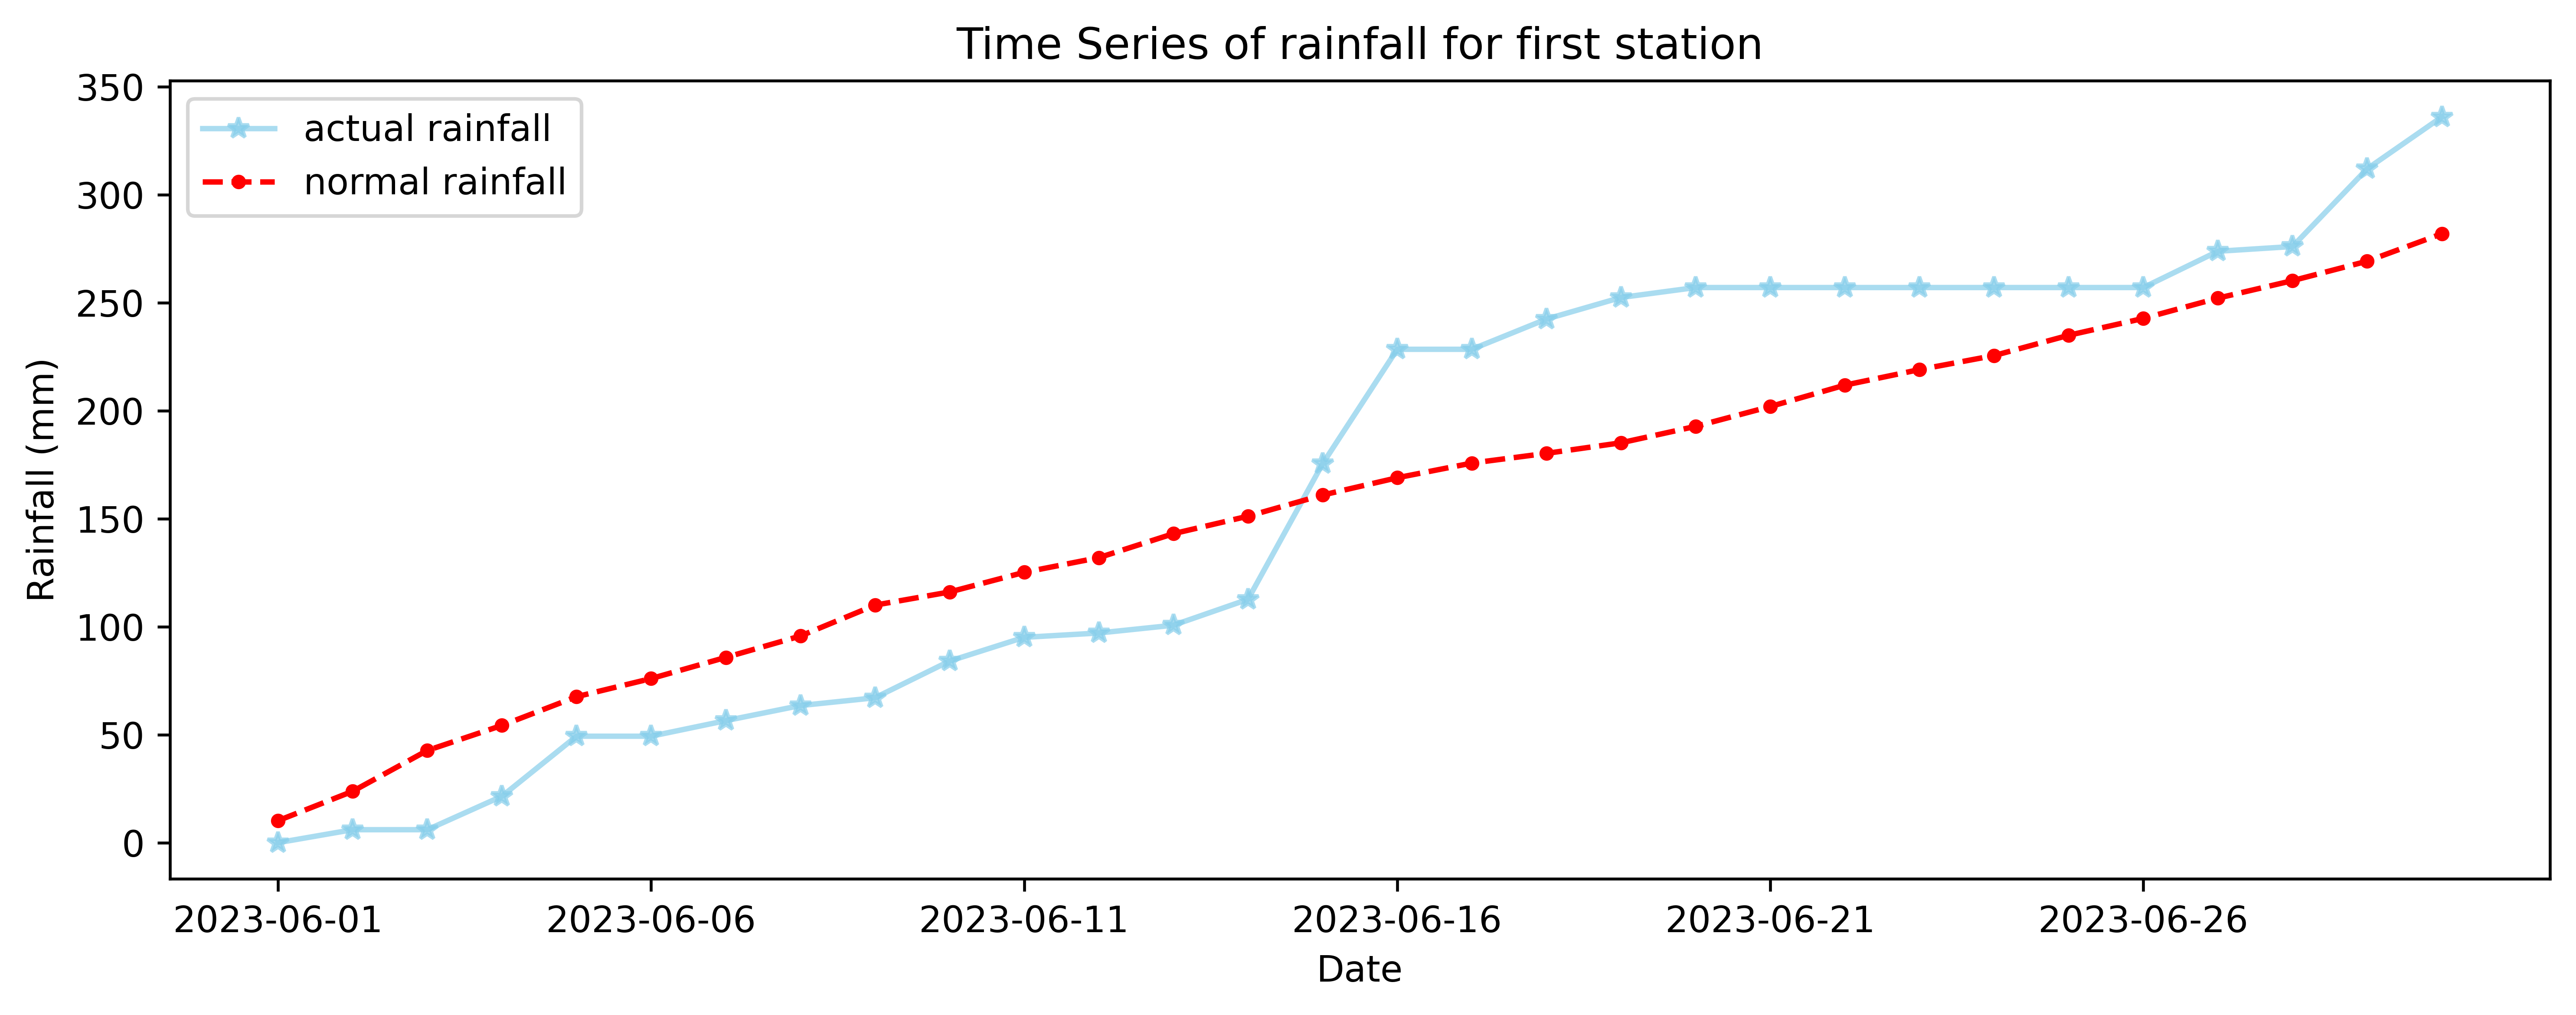

In [34]:
import matplotlib.dates as mdates

# Create a bar plot

plt.figure(figsize=(10, 4), dpi=600)  # Adjust the figure size if needed
plt.plot(new_ds['date'], new_ds['cum_sum'], color='skyblue', alpha=0.7,label ='actual rainfall', marker='*')
plt.plot(new_ds['date'], new_ds['cum_normal'], linestyle='--', color ='red', label ='normal rainfall', marker='.')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Time Series of rainfall for first station')
# Format x-axis ticks to display only date and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate x-axis labels for better readability (optional)
plt.xticks(new_ds['date'][::5],rotation=0)  # Rotate x-axis labels for better readability (optional)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
df  = actual
df1 = normal
# Selecting specific columns in dataframe
selected_elements = df[df['STATION'] == 'CAR NICOBAR'] # other method for selecting the specific question
selected_elements
new_df =selected_elements.iloc[0,4:]
filtered_dates = new_df.index[::2]
station = df['STATION']
nor_carnicobar =normal.iloc[0,4:]

# creating multiple plots for different number of station


In [40]:
#
df_all = df.iloc[:,4:]

In [41]:
df_all

,2023-06-01,2023-06-02,2023-06-03,2023-06-04,2023-06-05,2023-06-06,2023-06-07,2023-06-08,2023-06-09,2023-06-10,...,2023-06-21,2023-06-22,2023-06-23,2023-06-24,2023-06-25,2023-06-26,2023-06-27,2023-06-28,2023-06-29,2023-06-30
0,0.0,6.0,0.0,15.5,27.8,0.0,7.2,7.0,3.6,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.8,2.2,36.0,24.0
1,0.0,3.8,8.0,16.0,24.2,0.0,12.2,10.8,3.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.4,2.4,8.6,26.0,36.0
2,7.8,5.8,5.0,3.0,4.6,18.6,4.8,15.0,2.0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,7.6,0.0
3,10.6,2.4,-99.9,6.7,72.5,18.7,26.4,73.0,7.4,18.0,...,14.9,35.4,5.0,0.0,0.0,0.0,48.0,19.0,5.0,9.4
4,2.0,0.2,7.4,3.0,17.0,22.0,41.4,25.4,134.6,54.0,...,12.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
5,20.0,0.0,18.4,27.5,0.0,2.3,21.3,2.2,8.5,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,16.9,34.2
6,2.6,0.8,23.2,0.1,65.4,1.2,73.6,140.0,3.8,16.1,...,2.1,0.0,0.0,0.0,0.0,0.2,22.6,28.3,2.4,2.4
7,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9
8,-99.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.2,...,42.6,45.0,6.0,0.0,0.0,4.0,8.0,8.6,2.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,...,8.1,-99.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
station_name = df['STATION']


In [ ]:
df_all

In [43]:
df_all = df_all.replace(-99.9, np.nan) # replacing specific value with nan


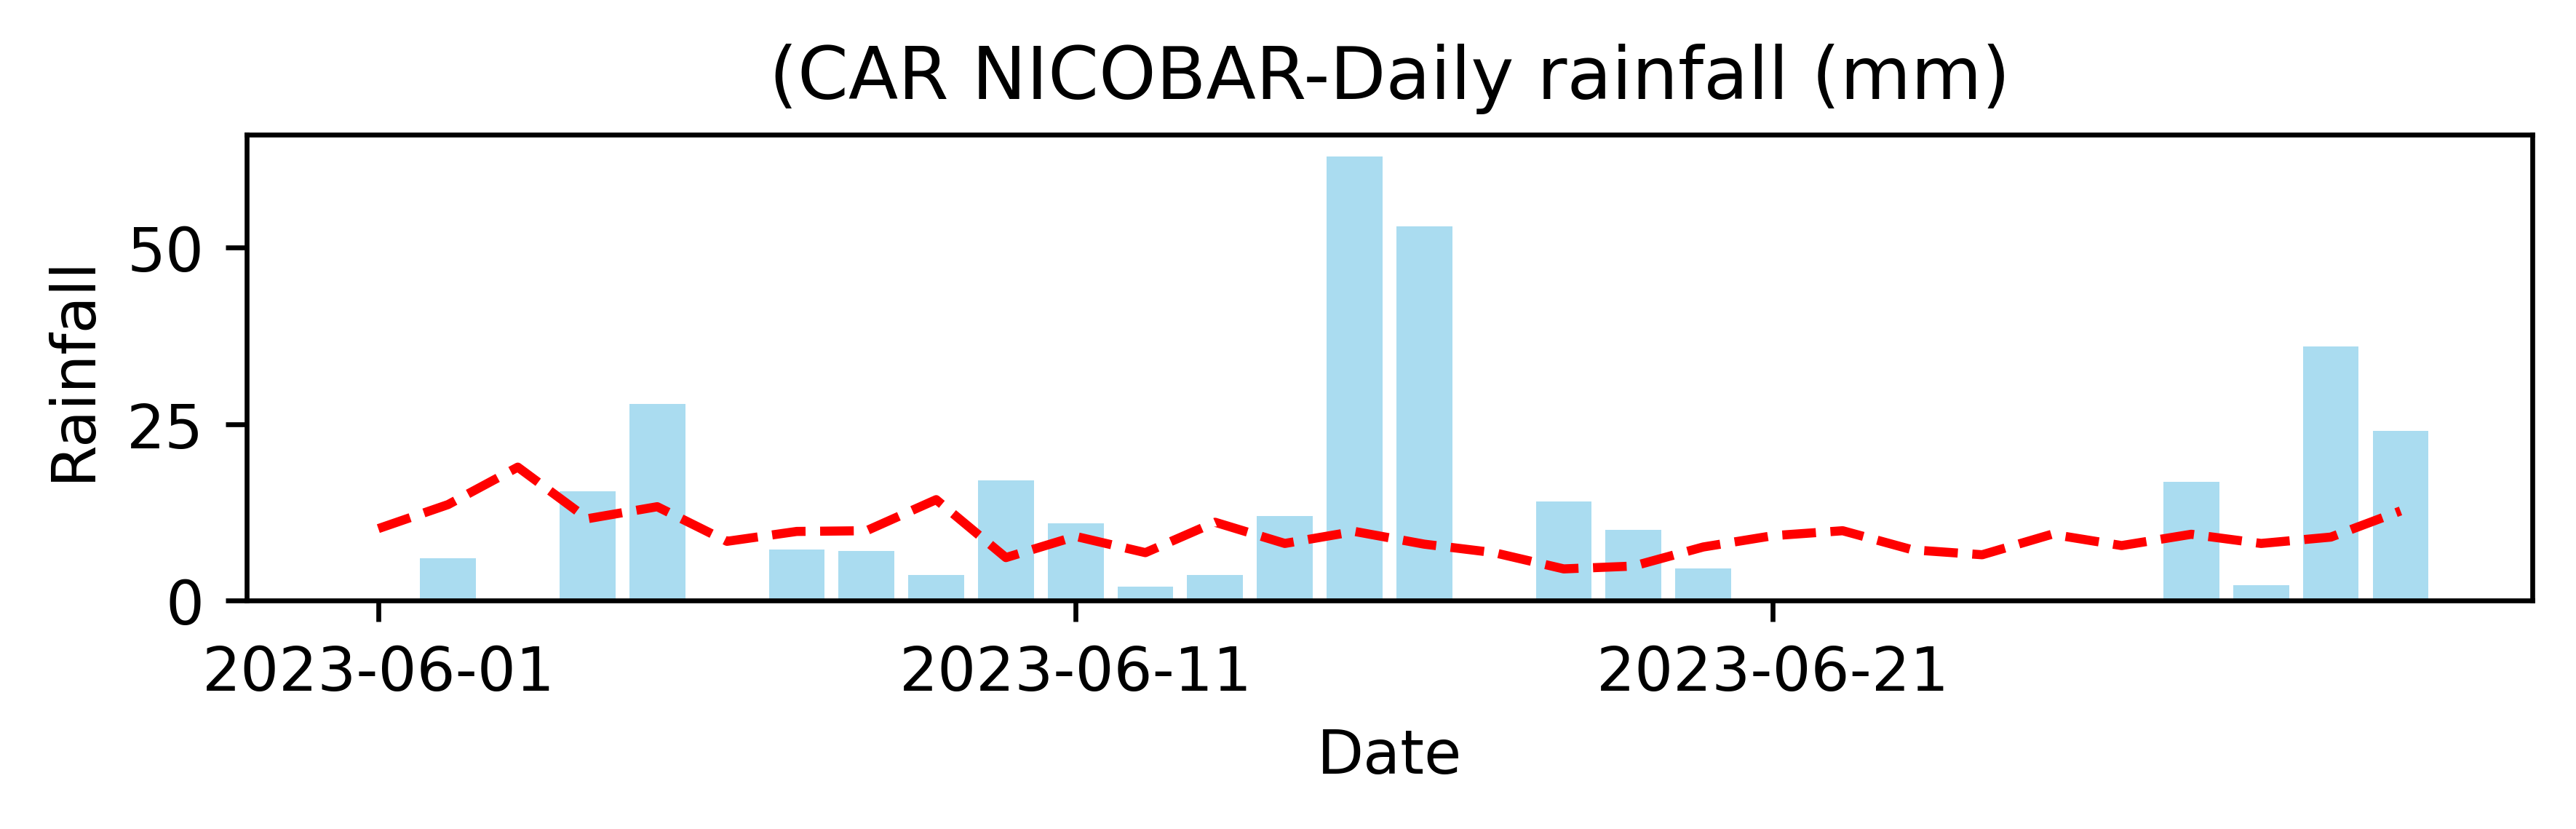

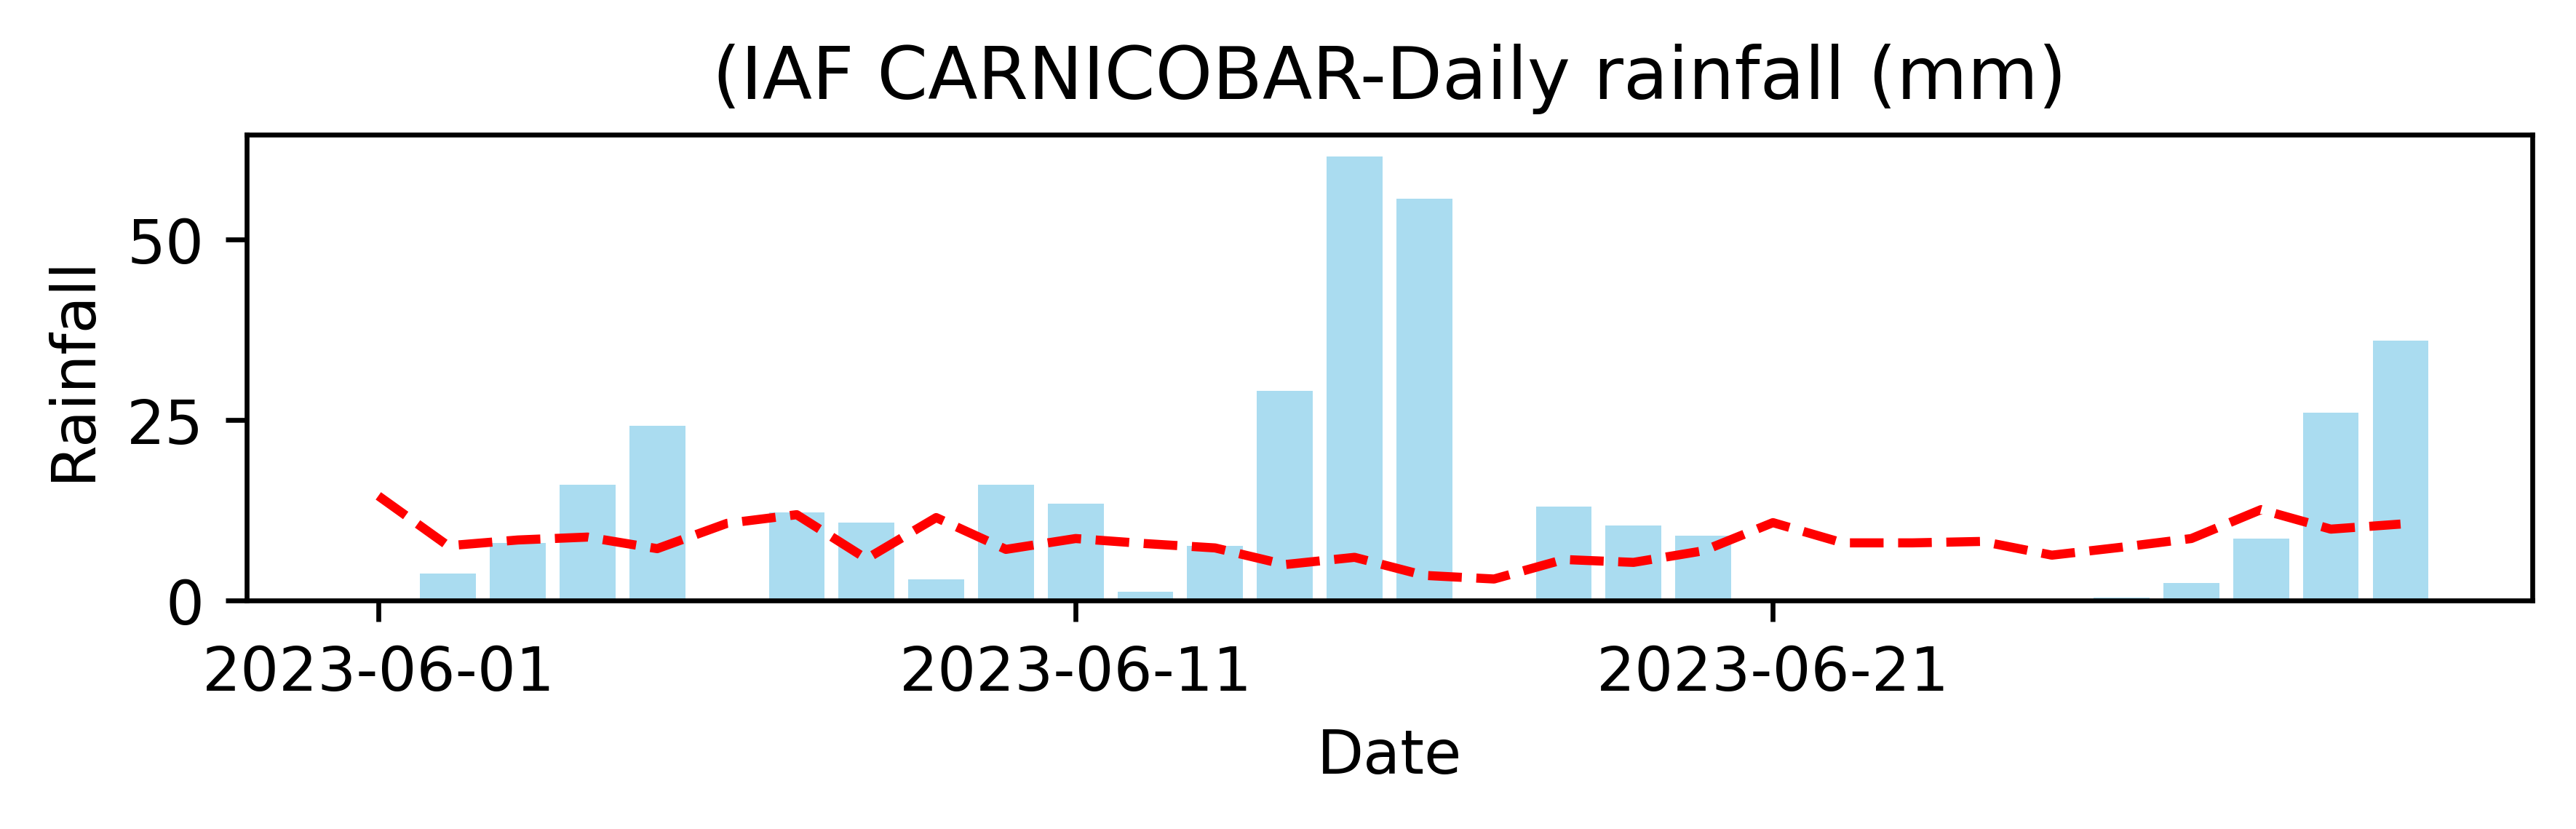

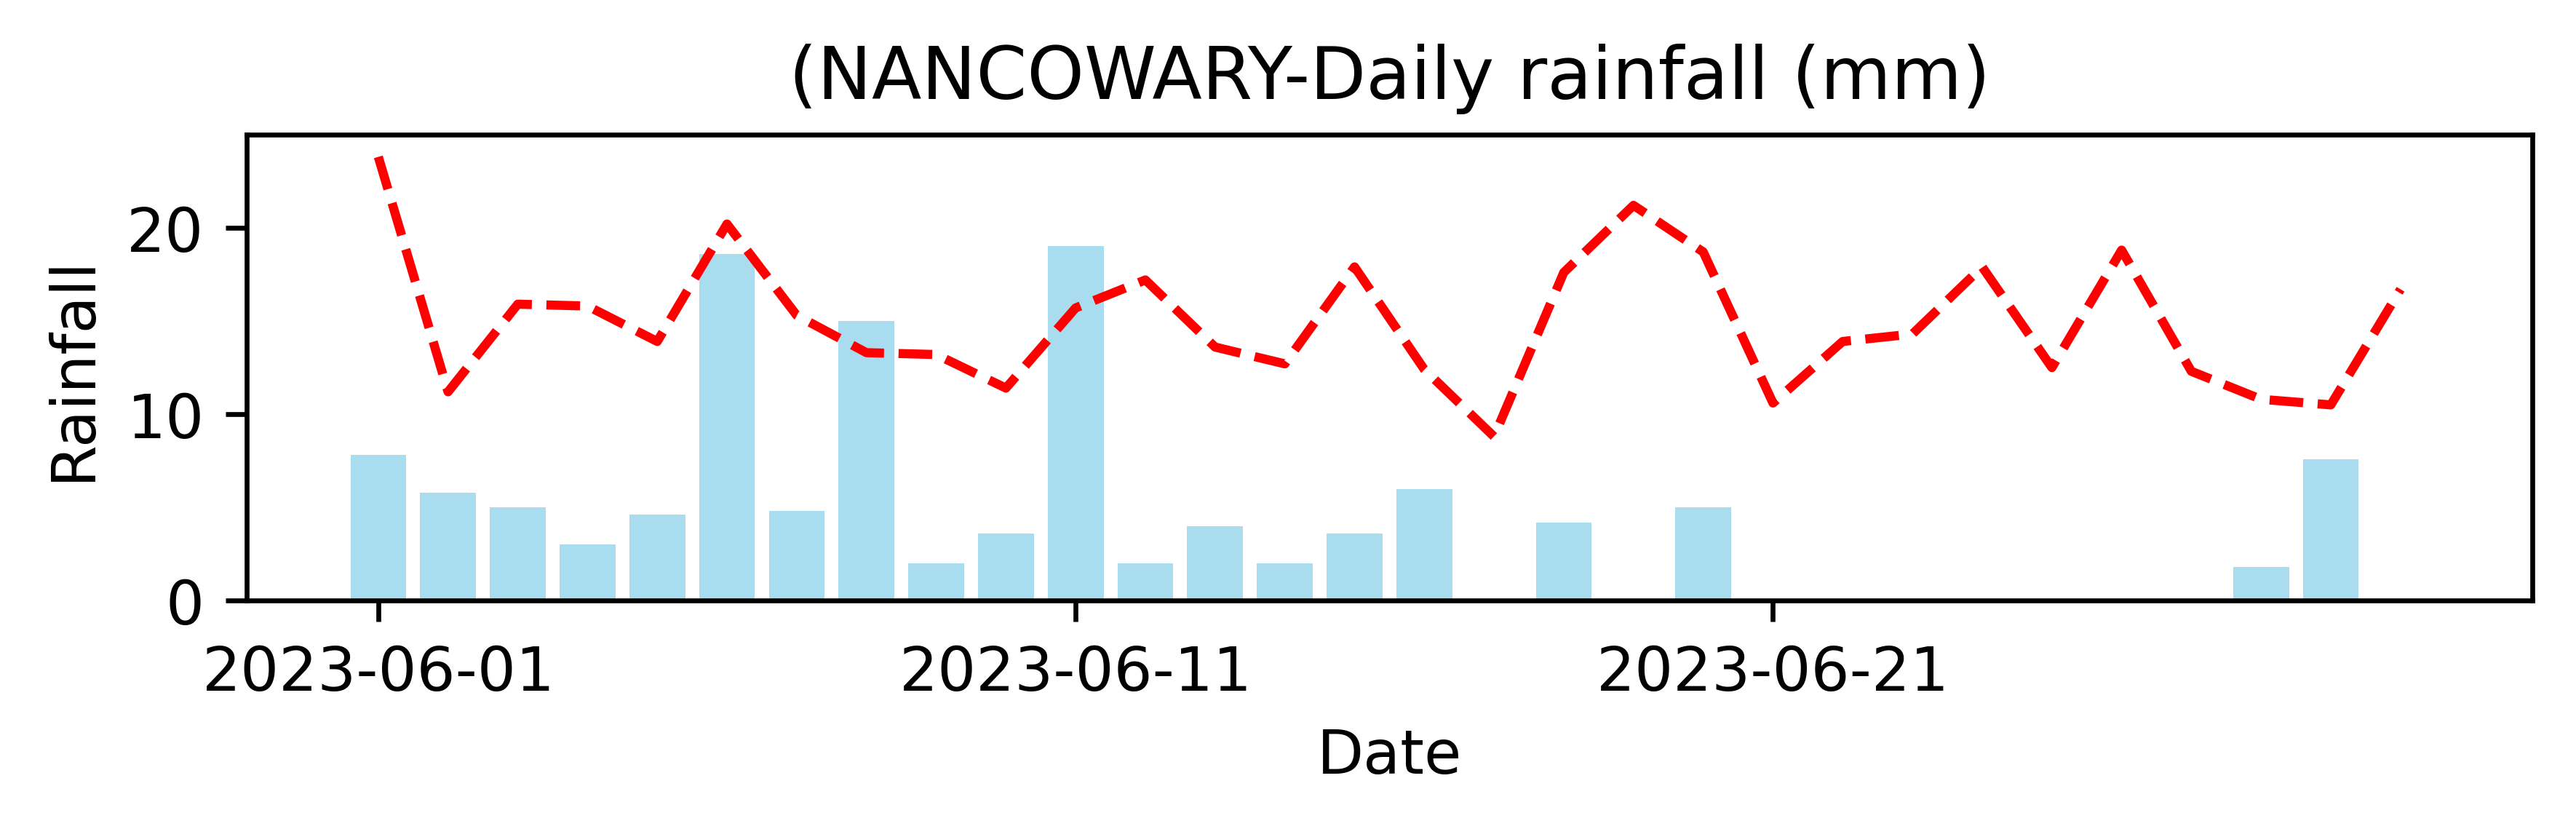

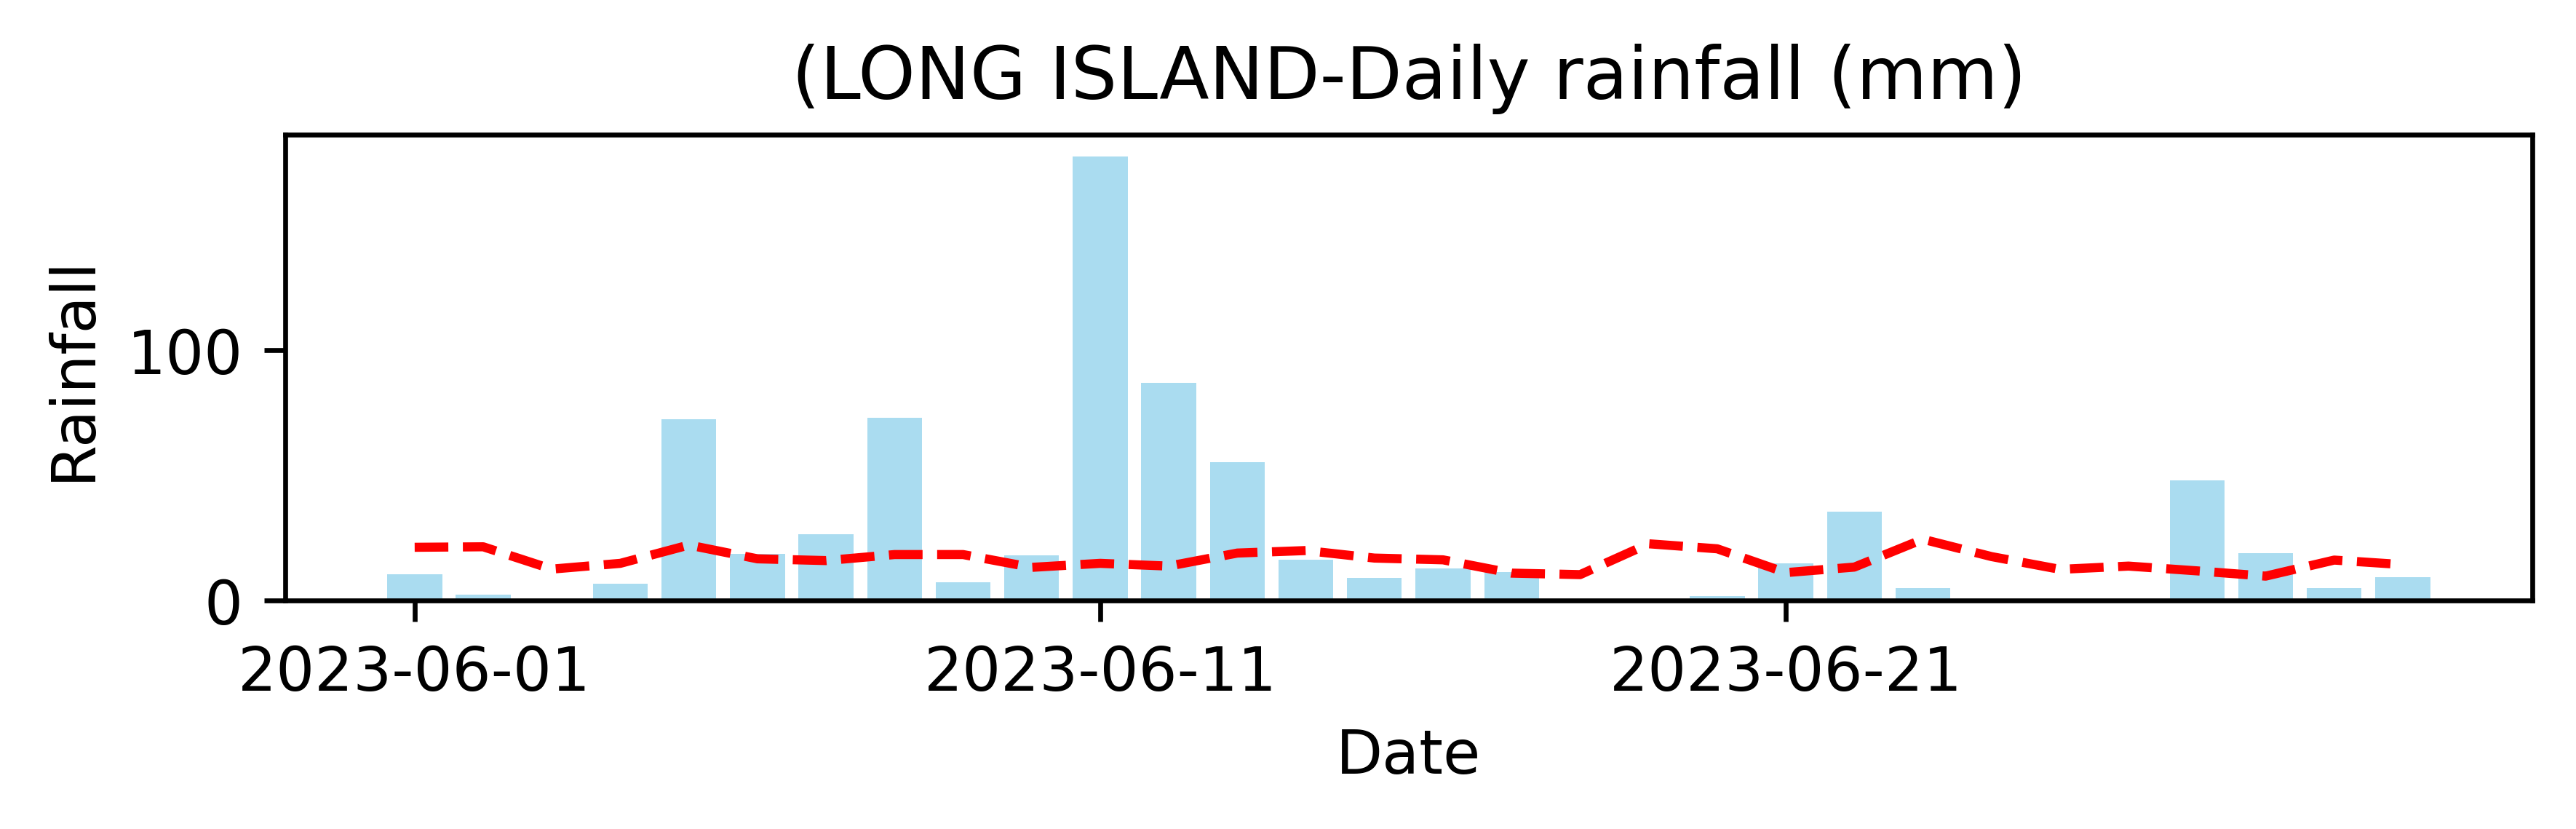

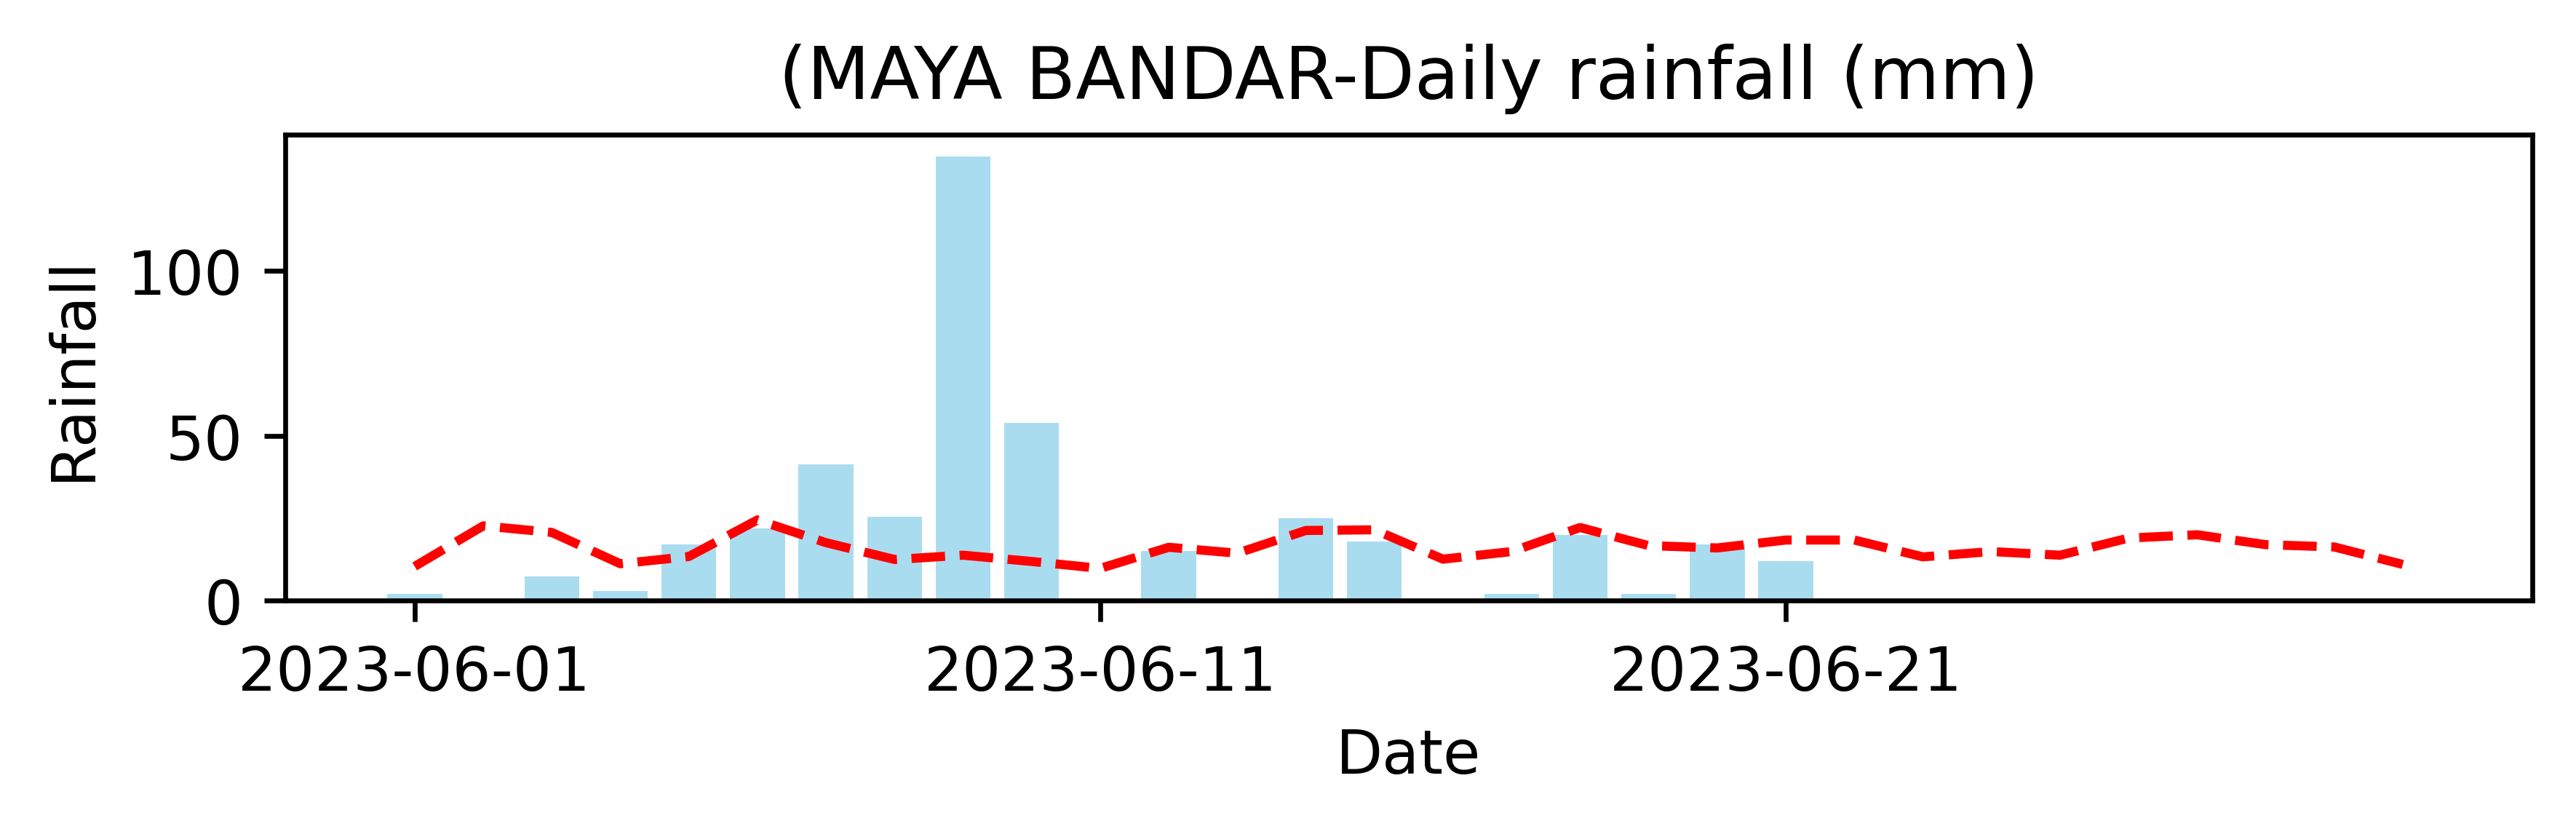

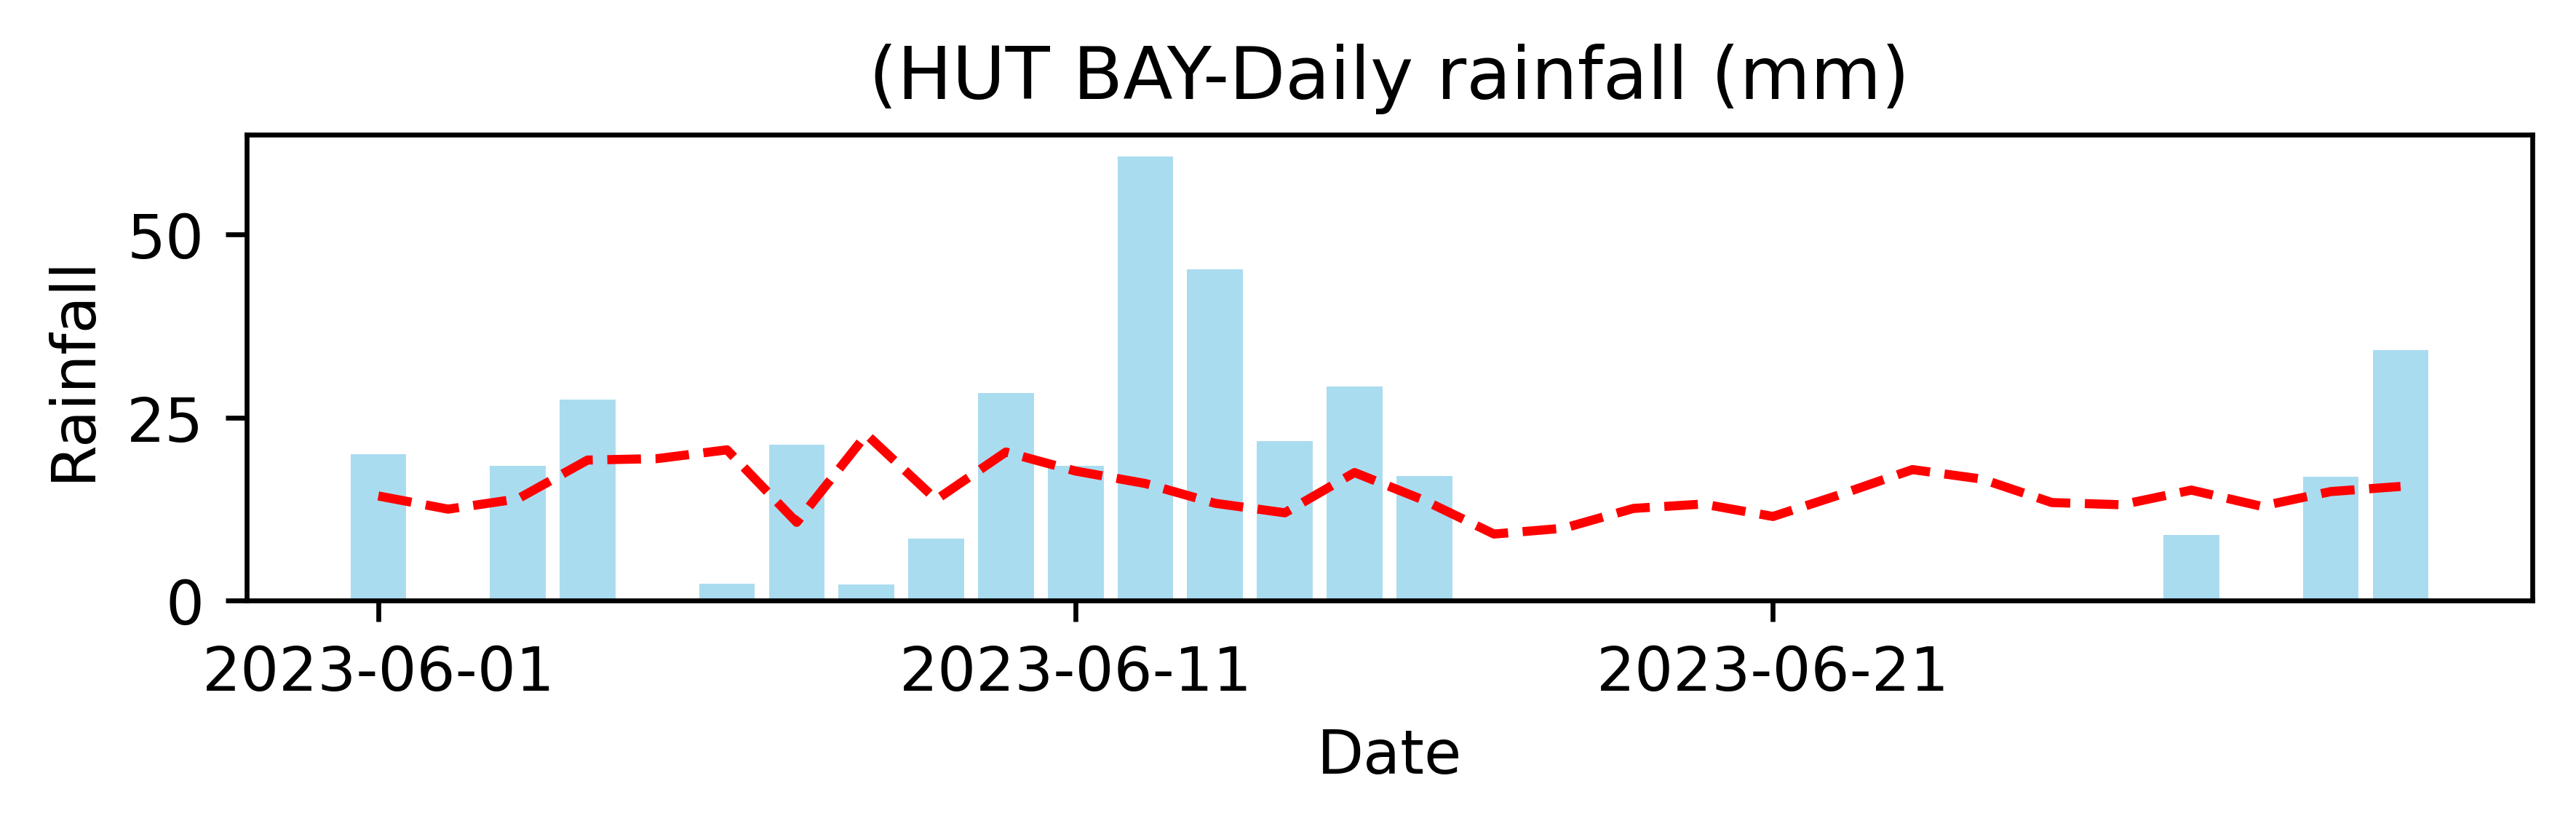

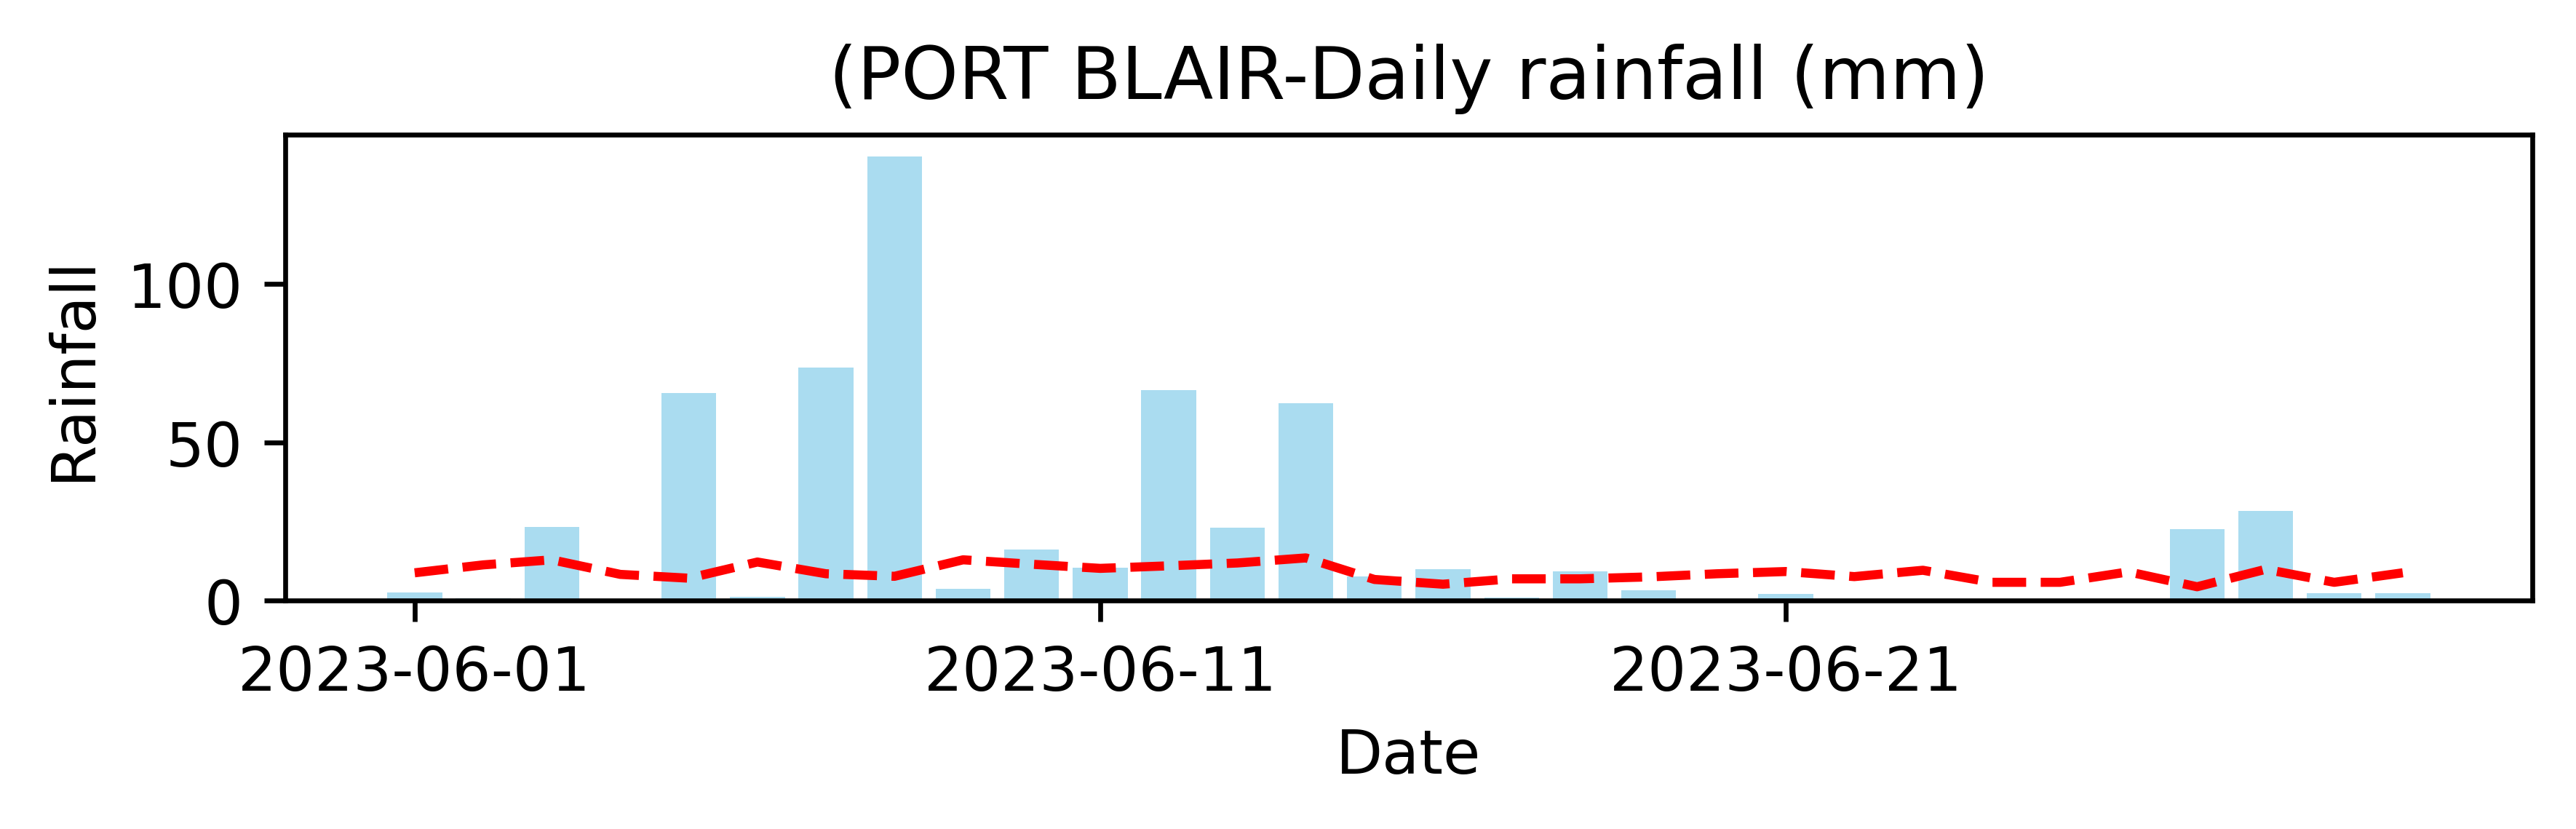

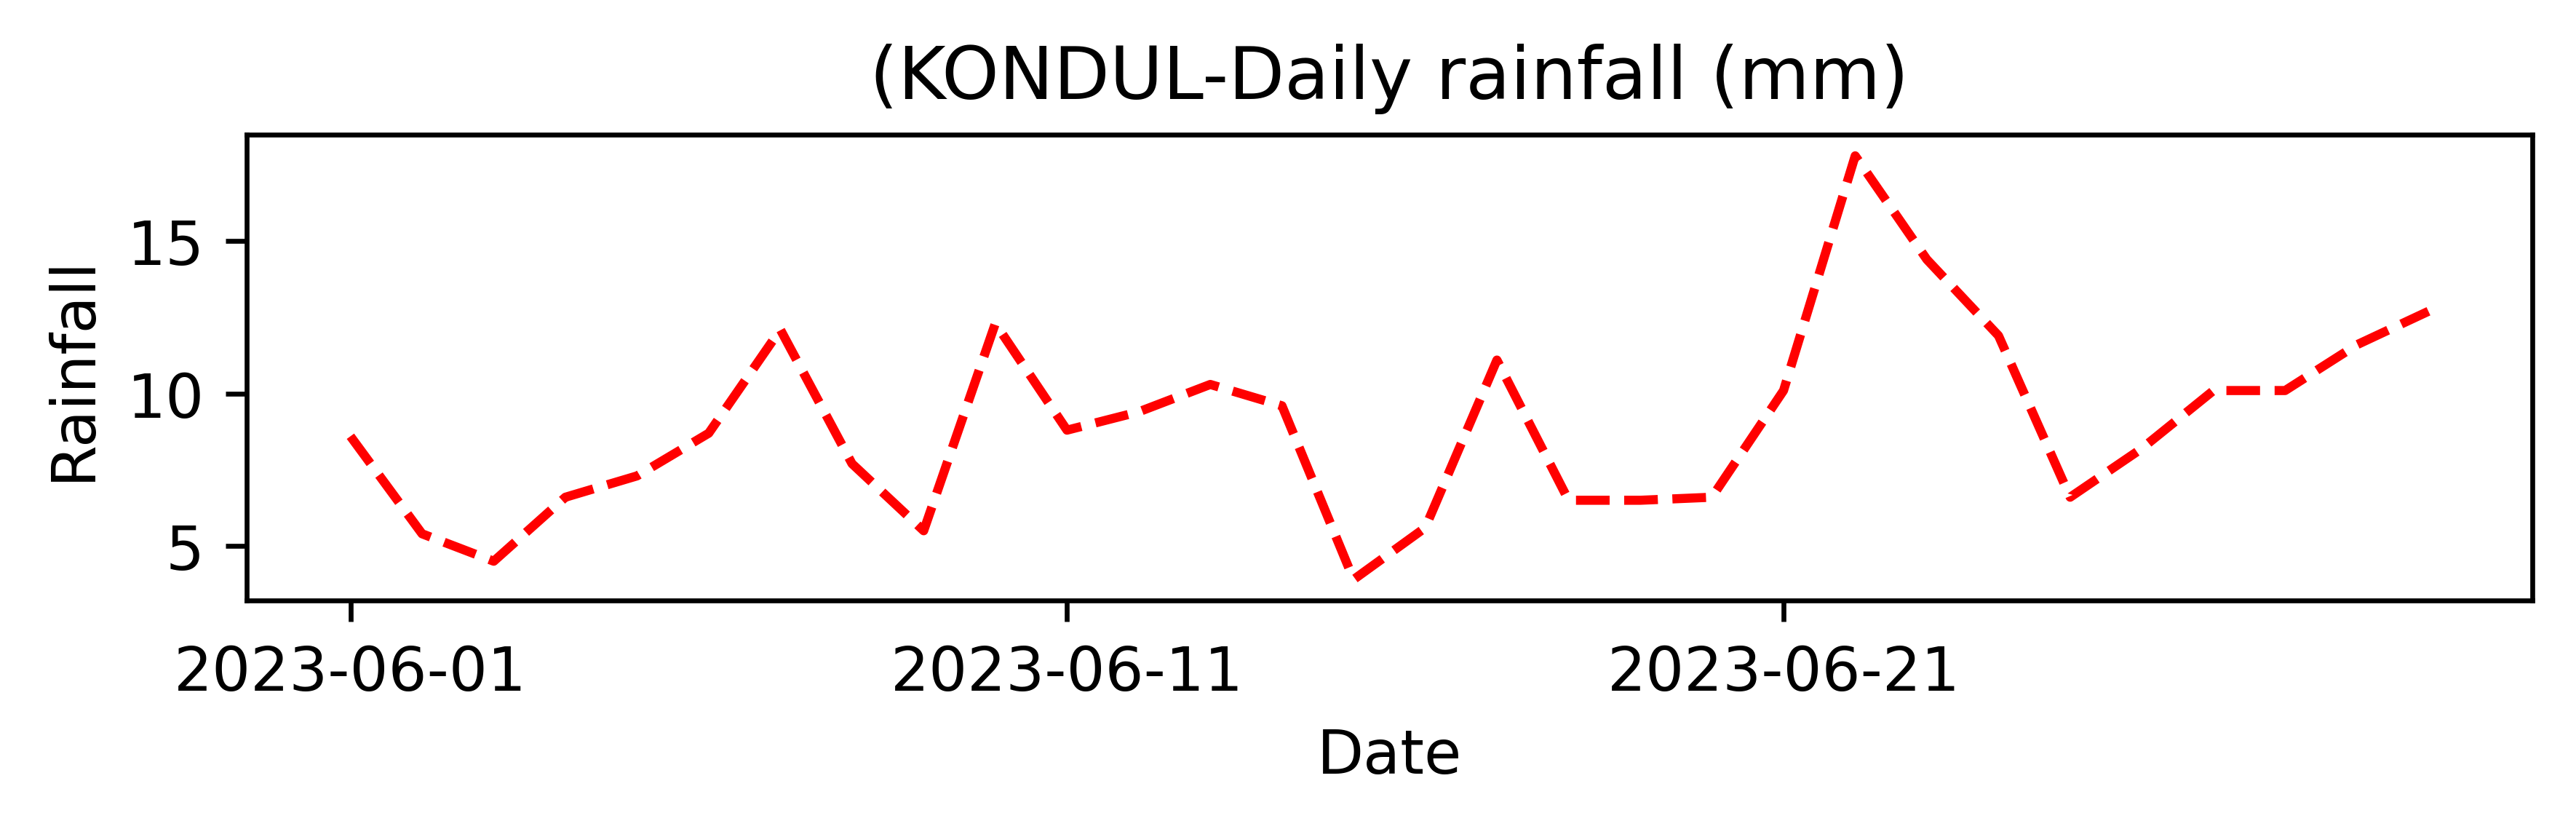

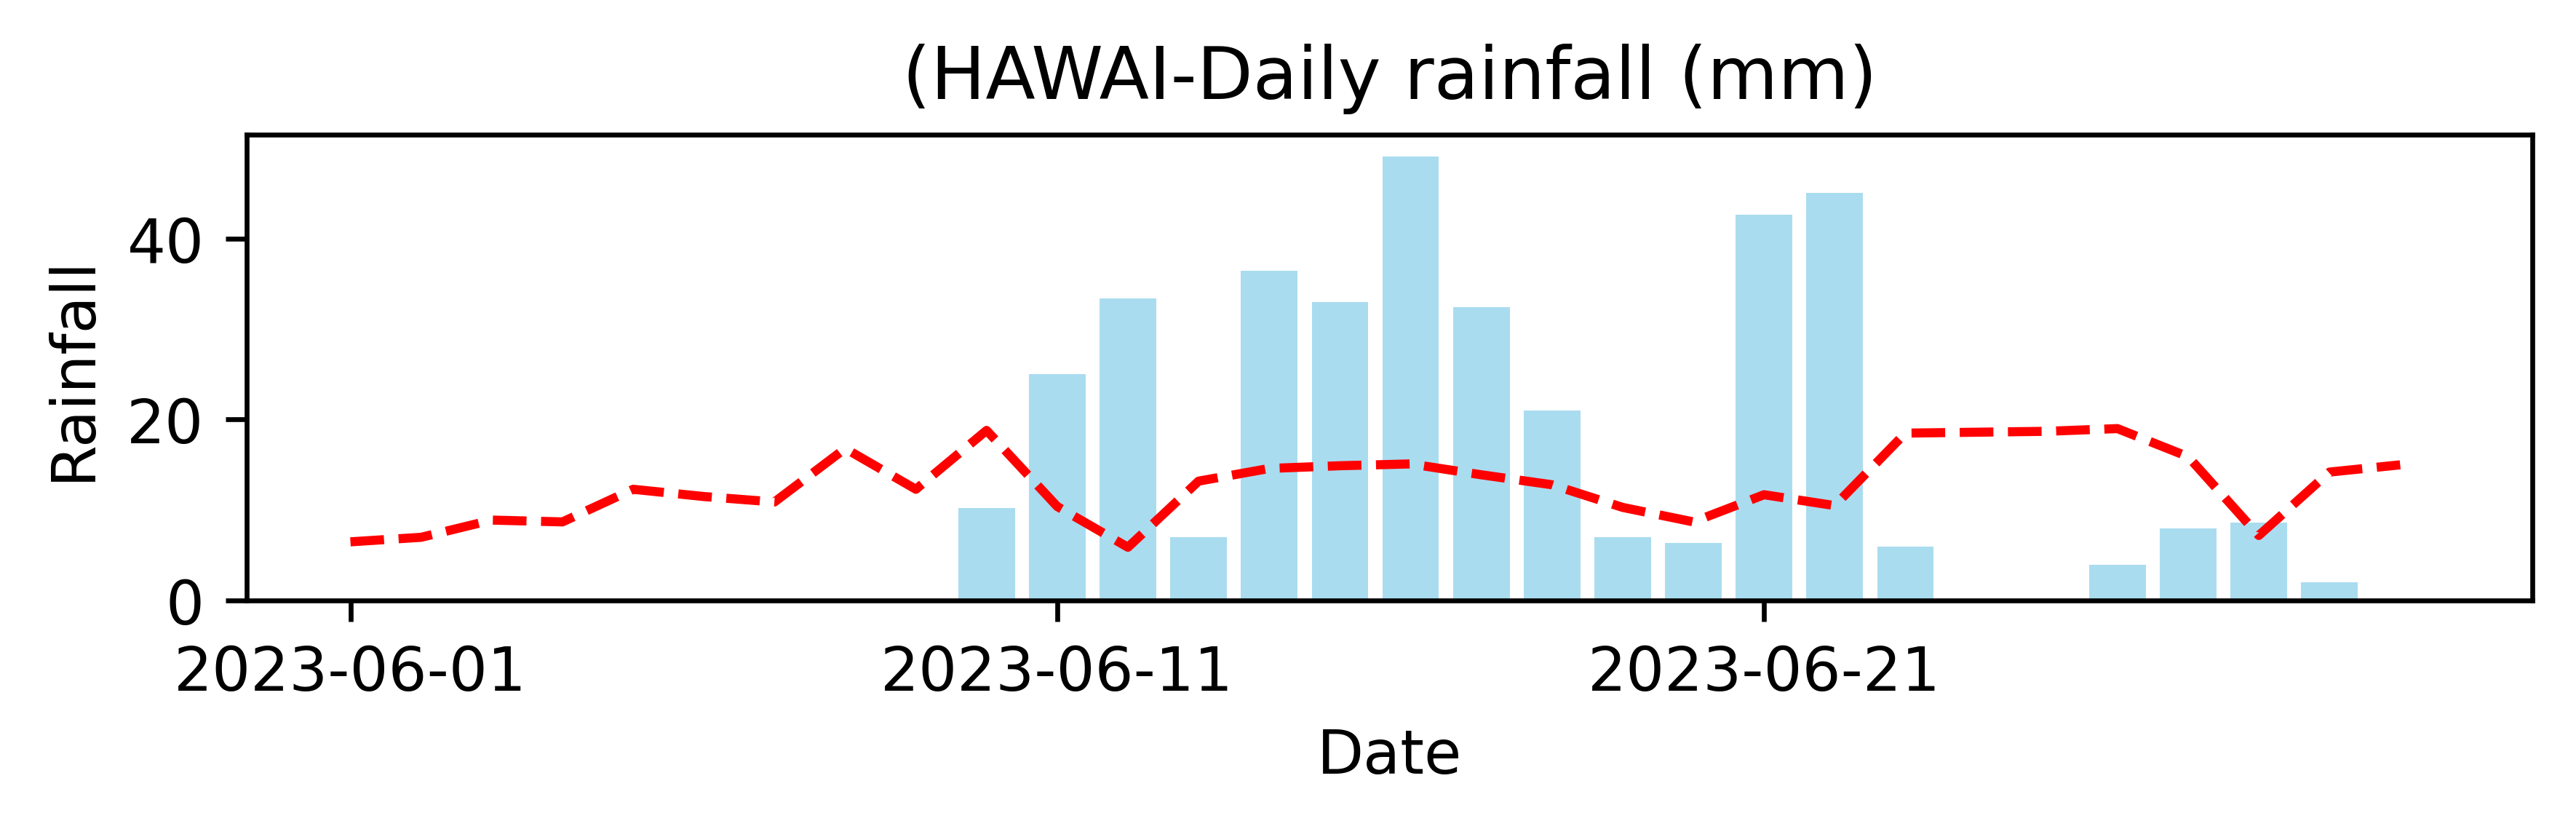

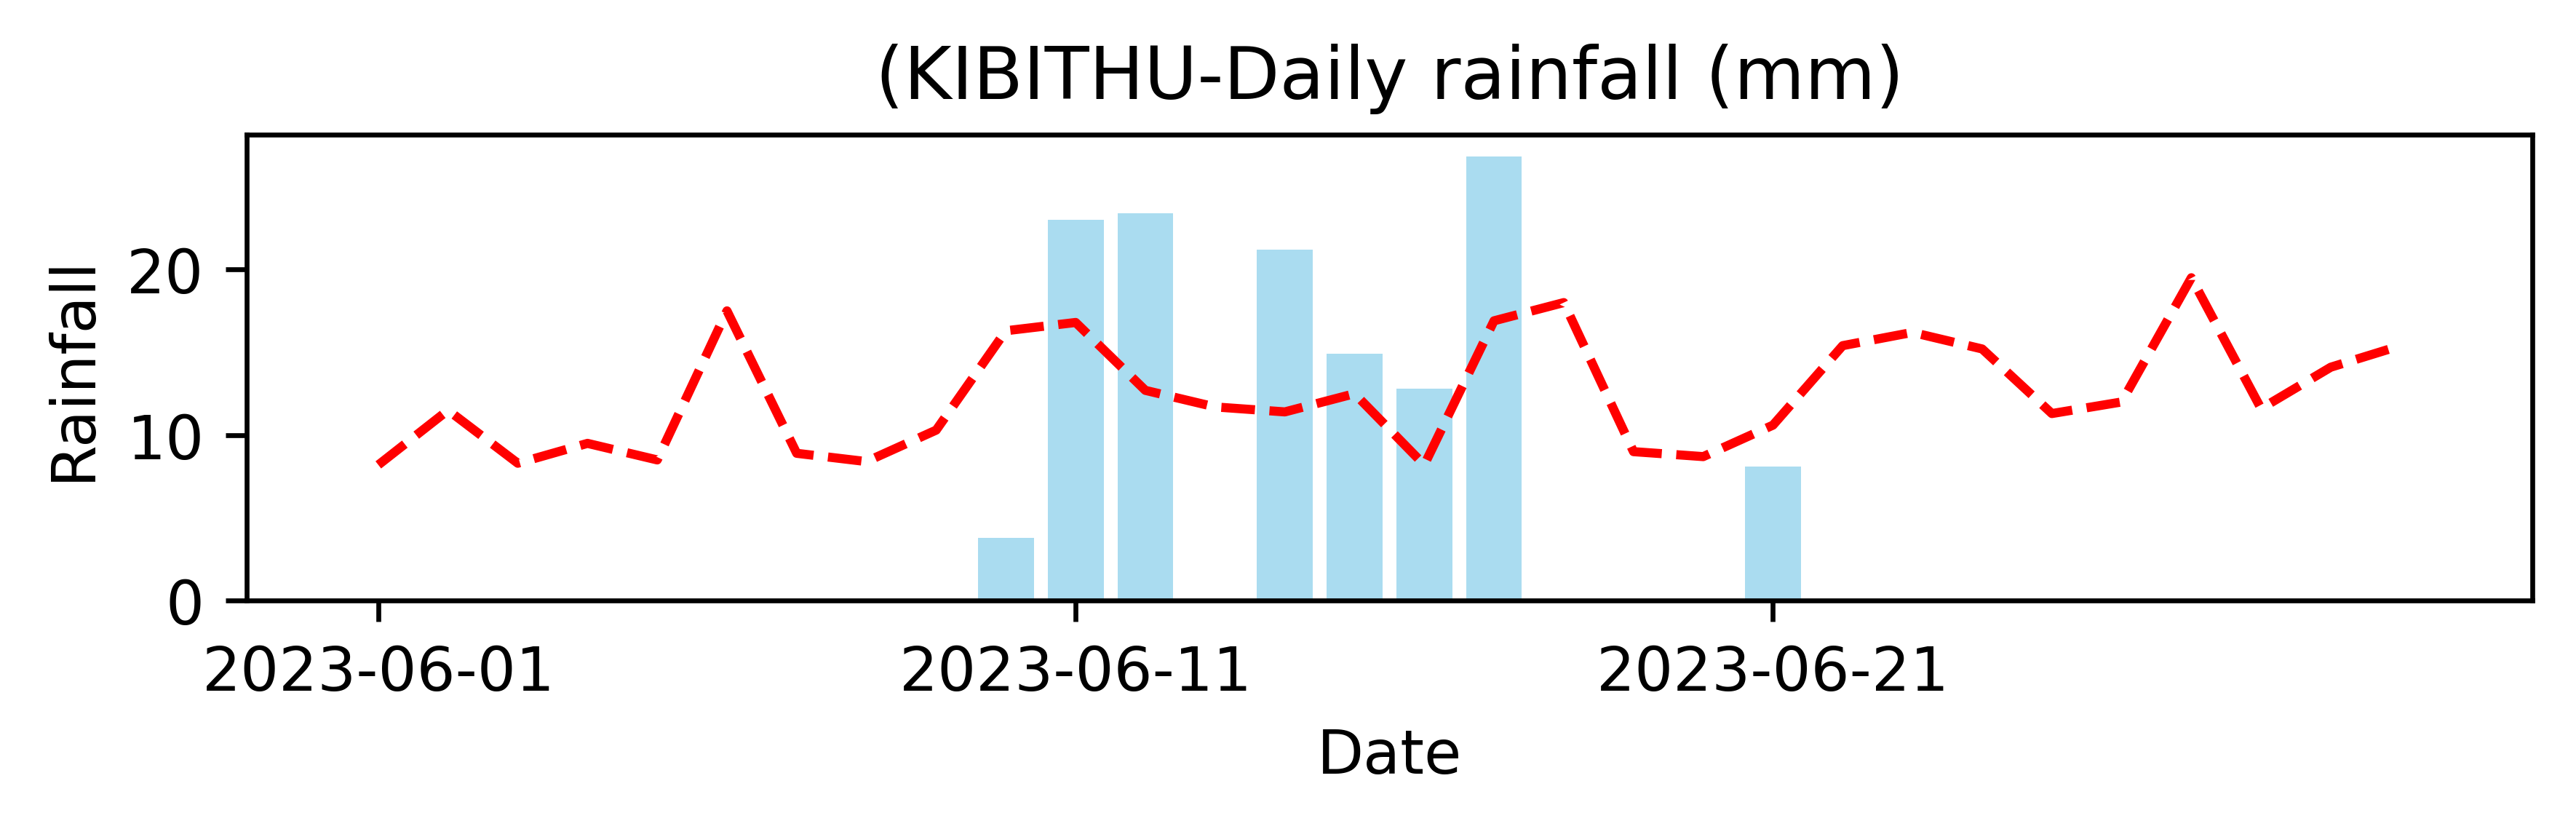

In [44]:




for i in range(10):
    
    
    plt.figure(figsize=(6, 2), dpi=600)  # Adjust the figure size if needed
    plt.bar(df_all.iloc[i,:].index, df_all.iloc[i,:].values, width=0.8, color='skyblue', alpha=0.7)
    plt.plot(new_df.index, normal.iloc[i,4:], linestyle='--', color ='red')

    plt.xlabel('Date')
    plt.ylabel('Rainfall')
    plt.title('('+str(station[i])+'-Daily rainfall (mm)')
    # Format x-axis ticks to display only date and year
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(df_all.iloc[i,:].index[::10],rotation=0)  # Rotate x-axis labels for better readability (optional)

    # Display the plot
    plt.tight_layout()
    plt.show()


In [ ]:
# Lets explore the spatial ploting dataset

In [ ]:
sp_df = spatial

In [45]:
spatial

,S.NO.,STATION,LAT,LON,2023-06-01 00:00:00,2023-06-02 00:00:00,2023-06-03 00:00:00,2023-06-04 00:00:00,2023-06-05 00:00:00,2023-06-06 00:00:00,...,2023-06-21 00:00:00,2023-06-22 00:00:00,2023-06-23 00:00:00,2023-06-24 00:00:00,2023-06-25 00:00:00,2023-06-26 00:00:00,2023-06-27 00:00:00,2023-06-28 00:00:00,2023-06-29 00:00:00,2023-06-30 00:00:00
0,1,CAR NICOBAR,9.17,92.83,0.0,6.0,0.0,15.5,27.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.8,2.2,36.0,24.0
1,2,IAF CARNICOBAR,9.15,92.81,0.0,3.8,8.0,16.0,24.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,2.4,8.6,26.0,36.0
2,3,NANCOWARY,7.98,93.53,7.8,5.8,5.0,3.0,4.6,18.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,7.6,0.0
3,4,LONG ISLAND,12.42,92.93,10.6,2.4,19.9,6.7,72.5,18.7,...,14.9,35.4,5.0,0.0,0.0,0.0,48.0,19.0,5.0,9.4
4,5,MAYA BANDAR,12.92,92.92,2.0,0.2,7.4,3.0,17.0,22.0,...,12.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,4416,VYTTIRI,11.55,76.04,2.2,0.0,16.5,16.4,10.0,-99.9,...,0.0,11.0,0.0,5.0,3.0,14.0,6.5,37.0,3.0,21.0
4416,4417,AGATHI,10.85,72.47,31.2,0.2,0.0,1.4,92.6,2.0,...,0.4,0.0,0.7,0.0,0.0,61.2,25.6,7.8,0.7,12.2
4417,4418,AMINI,11.12,72.73,0.0,1.6,0.0,0.0,0.0,0.0,...,0.7,0.0,1.2,0.0,3.4,9.9,4.7,12.7,25.3,1.4
4418,4419,KAVARATTI,10.57,72.62,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9


In [10]:
#
lat = spatial['LAT']
lon = spatial['LON']
var = spatial.iloc[:,4]


In [47]:
lat.shape
lon.shape

(4420,)

In [48]:
import numpy as np

# Irregular latitude and longitude coordinates
lats = np.asarray([lat])[0]
lons = np.asarray([lon])[0]

# Corresponding data values
data = np.asarray([var])[0]

min_lat,max_lat, num_rows = np.min(lats), np.max(lats), lats.shape[0]
min_lon,max_lon, num_columns = np.min(lons), np.max(lons),lons.shape[0]

array([  0. ,   0. ,   7.8, ...,   0. , -99.9,   0. ])

In [12]:
new_data =np.where(data==-99.9, np.nan, data)

In [13]:
# Define the regular grid
grid_lats = np.linspace(min_lat, max_lat, num_rows)
grid_lons = np.linspace(min_lon, max_lon, num_columns)

# Create a meshgrid from the grid coordinates which are defined
grid_lons, grid_lats = np.meshgrid(grid_lons, grid_lats)


In [53]:
grid_lons

array([[68.78      , 68.78638606, 68.79277212, ..., 96.98722788,
        96.99361394, 97.        ],
       [68.78      , 68.78638606, 68.79277212, ..., 96.98722788,
        96.99361394, 97.        ],
       [68.78      , 68.78638606, 68.79277212, ..., 96.98722788,
        96.99361394, 97.        ],
       ...,
       [68.78      , 68.78638606, 68.79277212, ..., 96.98722788,
        96.99361394, 97.        ],
       [68.78      , 68.78638606, 68.79277212, ..., 96.98722788,
        96.99361394, 97.        ],
       [68.78      , 68.78638606, 68.79277212, ..., 96.98722788,
        96.99361394, 97.        ]])

In [56]:
from scipy.interpolate import griddata

# Perform linear interpolation
grid_data = griddata((lons, lats), data, (grid_lons, grid_lats), method='linear', rescale=True)

In [57]:
grid_data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [15]:
new_grid_data =np.where(grid_data<0, np.nan,grid_data)

In [16]:
read_shp =gpd.read_file("D:\homogenous_region_shp\Homogeneous Region Shape File1.shp")

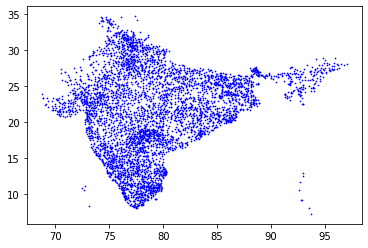

In [55]:
#plt.contourf(new_data, cmap ='jet', vmin=0.1, vmax =100); plt.colorbar()

plt.scatter(lon,lat, color='b', marker ='.', s=2)

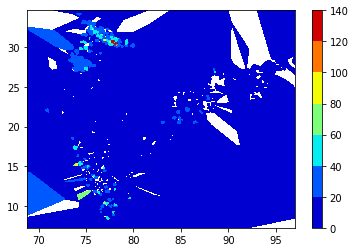

In [58]:
plt.contourf(grid_lons,grid_lats, new_grid_data, cmap ='jet', corner_mask=True)
plt.colorbar()

In [17]:
# convert netcdf to text file

import xarray as xr

ds = xr.open_dataset("E:imd_data/RF25_ind2000_rfp25.nc")

# Reading GRD files in python 
required library : xgrads

In [59]:
# Converting grd to netcdf files
from xgrads import open_CtlDataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [60]:
df = open_CtlDataset('E:ctl_data/d-1.ctl') # read the file


In [61]:
df

<xarray.Dataset>
Dimensions:  (time: 3, lat: 129, lon: 135)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03
  * lat      (lat) float32 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float32 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
Data variables:
    RF       (time, lat, lon) float32 dask.array<chunksize=(3, 129, 135), meta=np.ndarray>
Attributes:
    comment:  RFANOMALY
    storage:  99
    title:    0.25
    undef:    -999.0
    pdef:     None

In [62]:
# Converting this grd file into netcdf

input_file = 'E:ctl_data/d-1.ctl'


open_CtlDataset(input_file).to_netcdf('4_sep_rainfall.nc')

In [63]:
# Just check the created file 

ds = xr.open_dataset("4_sep_rainfall.nc")


# netcdf to grd 

In [64]:
ds

<xarray.Dataset>
Dimensions:  (time: 3, lat: 129, lon: 135)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03
  * lat      (lat) float32 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float32 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
Data variables:
    RF       (time, lat, lon) float32 ...
Attributes:
    comment:  RFANOMALY
    storage:  99
    title:    0.25
    undef:    -999.0
    pdef:     None

In [21]:
# read the variables from file
lat = df['lat'].values # you can read in array format just add .values 
lon = df['lon'].values
rainfall = df['RF'].values

In [68]:
lat = ds['lat'].values
lon = ds['lon'].values
rainfall= ds['RF'][0,:,:]

In [69]:
new_df =rainfall.to_dataframe()


In [71]:
new_df

time     RF
lat  lon                     
6.5  66.50  2020-01-01 -999.0
     66.75  2020-01-01 -999.0
     67.00  2020-01-01 -999.0
     67.25  2020-01-01 -999.0
     67.50  2020-01-01 -999.0
...                ...    ...
38.5 99.00  2020-01-01 -999.0
     99.25  2020-01-01 -999.0
     99.50  2020-01-01 -999.0
     99.75  2020-01-01 -999.0
     100.00 2020-01-01 -999.0

[17415 rows x 2 columns]

In [72]:
# Converting netcdf data to csv/txt


new_df.to_csv('new_output.csv')


# Excercise

1. Create a line and bar plot for IAF CAR NICOBAR station [

### Can be attempted later
2. Read GRD file and convert to the netcdf (I will provide a GRD and descriptory file)
3. try the different method of interpolation for converting irregular grid data to regular grid data
(hint: e.g. linear, cubic, nearest)


